In [1]:
import pandas as pd #Manejo de archivos y análisis de datos
import numpy as np #Creación de matrices y vectores multidimensionales
import matplotlib.pyplot as plt #Generar/Crear gráficas (Histogramas)
import seaborn as sns
from sklearn import metrics #Dividir, entrenar y predecir
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential 
from keras.layers import Dense
import tensorflow as tf


In [2]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')
    return df

In [3]:
ingresos = leer_datos("data_evaluacion.csv")
ingresos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
nuevos_nombres = [
    'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_Num', 
    'Marital_Status', 'Occupation', 'Relationship', 'Race', 
    'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 
    'Native_Country', 'Income'
]
ingresos.columns = nuevos_nombres

In [5]:
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
ingresos['Sex'] = ingresos['Sex'].map({'Male': 1, 'Female': 0})

In [7]:
ingresos['Income'] = ingresos['Income'].map({'<=50K': 0, '>50K': 1})
ingresos.head(5)

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [8]:
marital_status_categorias = ingresos['Marital_Status'].unique()
print("Categorías únicas en 'Marital-Status':")
print(marital_status_categorias)

Categorías únicas en 'Marital-Status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


Agrupamos en dos categorías al ser bastantes categorías únicas, en Soltero y Pareja

In [9]:
ingresos['Marital_Status'] = ingresos['Marital_Status'].replace(['Never-married','Divorced','Married-spouse-absent','Separated','Widowed'],'Soltero')
ingresos['Marital_Status'] = ingresos['Marital_Status'].replace(['Married-civ-spouse', 'Married-AF-spouse'],'Pareja')
ingresos.head()


,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Soltero,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Pareja,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Soltero,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Pareja,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Pareja,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [10]:
ingresos['Marital_Status'] = ingresos['Marital_Status'].map({'Soltero': 1, 'Pareja': 0})
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [11]:
raza_categorias = ingresos['Race'].unique()
print("Categorías únicas en 'Race':")
print(raza_categorias)

Categorías únicas en 'Race':
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [12]:
label_encoder = LabelEncoder()
ingresos['Race'] = label_encoder.fit_transform(ingresos['Race'])
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,2,0,0,0,40,Cuba,0


In [13]:
relacion_categorias = ingresos['Relationship'].unique()
print("Categorías únicas en 'Relationship':")
print(relacion_categorias)

Categorías únicas en 'Relationship':
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [14]:
label_encoder = LabelEncoder()
ingresos['Relationship'] = label_encoder.fit_transform(ingresos['Relationship'])
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,1,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,0,4,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,1,4,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,0,2,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,5,2,0,0,0,40,Cuba,0


In [15]:
education_categorias = ingresos['Education'].unique()
print("Categorías únicas en 'Education':")
print(education_categorias)

Categorías únicas en 'Education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [16]:
ingresos['Education'] = ingresos['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th'],'Primaria')
ingresos['Education'] = ingresos['Education'].replace(['9th','10th','11th','HS-grad','12th'],'Secundaria')
ingresos['Education'] = ingresos['Education'].replace(['Some-college','Assoc-acdm','Assoc-voc','Bachelors'],'Pregrado')
ingresos['Education'] = ingresos['Education'].replace(['Masters','Doctorate','Prof-school'],'Posgrado')
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Pregrado,13,1,Adm-clerical,1,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Pregrado,13,0,Exec-managerial,0,4,1,0,0,13,United-States,0
2,38,Private,215646,Secundaria,9,1,Handlers-cleaners,1,4,1,0,0,40,United-States,0
3,53,Private,234721,Secundaria,7,0,Handlers-cleaners,0,2,1,0,0,40,United-States,0
4,28,Private,338409,Pregrado,13,0,Prof-specialty,5,2,0,0,0,40,Cuba,0


In [17]:
label_encoder = LabelEncoder()
ingresos['Education'] = label_encoder.fit_transform(ingresos['Education'])
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,1,13,1,Adm-clerical,1,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,1,13,0,Exec-managerial,0,4,1,0,0,13,United-States,0
2,38,Private,215646,3,9,1,Handlers-cleaners,1,4,1,0,0,40,United-States,0
3,53,Private,234721,3,7,0,Handlers-cleaners,0,2,1,0,0,40,United-States,0
4,28,Private,338409,1,13,0,Prof-specialty,5,2,0,0,0,40,Cuba,0


In [18]:
# Identificar columnas con el signo '?'
columnas_con_signo_interrogacion = {}

for column in ingresos.columns:
    count = (ingresos[column] == '?').sum()
    if count > 0:
        columnas_con_signo_interrogacion[column] = count

# Mostrar resultados
print("Columnas con el signo '?' y sus ocurrencias:")
for column, count in columnas_con_signo_interrogacion.items():
    print(f"{column}: {count} ocurrencias")

Columnas con el signo '?' y sus ocurrencias:
Workclass: 2799 ocurrencias
Occupation: 2809 ocurrencias
Native_Country: 857 ocurrencias


In [19]:
workclass_categorias = ingresos['Workclass'].unique()
print("Categorías únicas en 'Workclass':")
print(workclass_categorias)

Categorías únicas en 'Workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [20]:
# Reemplazar '?' con NaN en 'Workclass'
ingresos['Workclass'].replace('?', np.nan, inplace=True)

# Calcular y rellenar NaN con la moda en 'Workclass'
mode_workclass = ingresos['Workclass'].mode()[0]
ingresos['Workclass'].fillna(mode_workclass, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_26240\2300373034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingresos['Workclass'].replace('?', np.nan, inplace=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_26240\2300373034.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [21]:
ingresos['Workclass'] = ingresos['Workclass'].replace({
    'State-gov': 'Gobierno', 'Federal-gov': 'Gobierno', 'Local-gov': 'Gobierno',
    'Private': 'Privado',
    'Self-emp-not-inc': 'Autoempleo', 'Self-emp-inc': 'Autoempleo',
    'Without-pay': 'Sin Pago',
    'Never-worked': 'Nunca Trabajado'
})


In [22]:
label_encoder = LabelEncoder()
ingresos['Workclass'] = label_encoder.fit_transform(ingresos['Workclass'])
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,1,77516,1,13,1,Adm-clerical,1,4,1,2174,0,40,United-States,0
1,50,0,83311,1,13,0,Exec-managerial,0,4,1,0,0,13,United-States,0
2,38,3,215646,3,9,1,Handlers-cleaners,1,4,1,0,0,40,United-States,0
3,53,3,234721,3,7,0,Handlers-cleaners,0,2,1,0,0,40,United-States,0
4,28,3,338409,1,13,0,Prof-specialty,5,2,0,0,0,40,Cuba,0


In [23]:
# Identificar columnas con el signo '?'
columnas_con_signo_interrogacion = {}

for column in ingresos.columns:
    count = (ingresos[column] == '?').sum()
    if count > 0:
        columnas_con_signo_interrogacion[column] = count

# Mostrar resultados
print("Columnas con el signo '?' y sus ocurrencias:")
for column, count in columnas_con_signo_interrogacion.items():
    print(f"{column}: {count} ocurrencias")

Columnas con el signo '?' y sus ocurrencias:
Occupation: 2809 ocurrencias
Native_Country: 857 ocurrencias


In [24]:
ocupacion_categorias = ingresos['Occupation'].unique()
print("Categorías únicas en 'Occupation':")
print(ocupacion_categorias)

Categorías únicas en 'Occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [25]:
ingresos['Occupation'].replace('?', np.nan, inplace=True)

# Calcular y rellenar NaN con la moda en 'Occupation'
mode_occupation = ingresos['Occupation'].mode()[0]
ingresos['Occupation'].fillna(mode_occupation, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_26240\2465892518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingresos['Occupation'].replace('?', np.nan, inplace=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_26240\2465892518.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [26]:
ingresos['Occupation'] = ingresos['Occupation'].replace({
    'Tech-support': 'Tecnología', 'Craft-repair': 'Oficios', 'Other-service': 'Servicios', 'Sales': 'Ventas', 'Exec-managerial': 'Gerencia', 'Prof-specialty': 'Profesional',
    'Handlers-cleaners': 'Manipulación', 'Machine-op-inspct': 'Operación de máquinas', 'Adm-clerical': 'Administrativo', 'Farming-fishing': 'Agricultura',
    'Transport-moving': 'Transporte', 'Priv-house-serv': 'Servicio doméstico','Protective-serv': 'Seguridad','Armed-Forces': 'Fuerzas Armadas'
})

In [27]:
label_encoder = LabelEncoder()
ingresos['Occupation'] = label_encoder.fit_transform(ingresos['Occupation'])
ingresos.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,1,77516,1,13,1,0,1,4,1,2174,0,40,United-States,0
1,50,0,83311,1,13,0,3,0,4,1,0,0,13,United-States,0
2,38,3,215646,3,9,1,4,1,4,1,0,0,40,United-States,0
3,53,3,234721,3,7,0,4,0,2,1,0,0,40,United-States,0
4,28,3,338409,1,13,0,7,5,2,0,0,0,40,Cuba,0


In [28]:
# Identificar columnas con el signo '?'
columnas_con_signo_interrogacion = {}

for column in ingresos.columns:
    count = (ingresos[column] == '?').sum()
    if count > 0:
        columnas_con_signo_interrogacion[column] = count

# Mostrar resultados
print("Columnas con el signo '?' y sus ocurrencias:")
for column, count in columnas_con_signo_interrogacion.items():
    print(f"{column}: {count} ocurrencias")

Columnas con el signo '?' y sus ocurrencias:
Native_Country: 857 ocurrencias


In [29]:
paises_categorias = ingresos['Native_Country'].unique()
print("Categorías únicas en 'Native Country':")
print(paises_categorias)

Categorías únicas en 'Native Country':
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [30]:
# Reemplazar '?' con NaN en 'Native_Country'
ingresos['Native_Country'].replace('?', np.nan, inplace=True)


C:\Users\crist\AppData\Local\Temp\ipykernel_26240\3335846599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingresos['Native_Country'].replace('?', np.nan, inplace=True)


In [31]:
ingresos['Native_Country'] = ingresos['Native_Country'].replace(
    ['United-States', 'Puerto-Rico', 'Canada', 'Mexico', 'Outlying-US(Guam-USVI-etc)'], 'América del Norte')
ingresos['Native_Country'] = ingresos['Native_Country'].replace(
    ['Cuba', 'Jamaica', 'Honduras', 'Columbia', 'El-Salvador', 'Guatemala', 'Dominican-Republic', 'Trinadad&Tobago'], 'América del Sur')
ingresos['Native_Country'] = ingresos['Native_Country'].replace(
    ['India', 'Cambodia', 'Thailand', 'Laos', 'Taiwan', 'Iran', 'Philippines', 'China', 'Japan', 'Vietnam', 'Hong'], 'Asia')
ingresos['Native_Country'] = ingresos['Native_Country'].replace(
    ['England', 'Scotland', 'Greece', 'Portugal', 'Ireland', 'France', 'Germany', 'Hungary', 'Poland', 'Italy', 'Yugoslavia', 'Holand-Netherlands'], 'Europa')
ingresos['Native_Country'] = ingresos['Native_Country'].replace(
    ['South'], 'América del Sur')

In [32]:
mode_native_country = ingresos['Native_Country'].mode()[0]
ingresos['Native_Country'].fillna(mode_native_country, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_26240\1496363624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingresos['Native_Country'].fillna(mode_native_country, inplace=True)


In [33]:
label_encoder = LabelEncoder()
ingresos['Native_Country'] = label_encoder.fit_transform(ingresos['Native_Country'])
ingresos.head()


,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,1,77516,1,13,1,0,1,4,1,2174,0,40,0,0
1,50,0,83311,1,13,0,3,0,4,1,0,0,13,0,0
2,38,3,215646,3,9,1,4,1,4,1,0,0,40,0,0
3,53,3,234721,3,7,0,4,0,2,1,0,0,40,0,0
4,28,3,338409,1,13,0,7,5,2,0,0,0,40,1,0


In [34]:
X = ingresos.drop(['Income'], axis=1)
y = ingresos['Income']

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
# Division de la data
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [38]:
# Verificar las etiquetas
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


In [39]:
# Crear modelo secuencial
modelo = Sequential()
modelo.add(Dense(32,input_dim=X_train.shape[1], activation='relu'))
modelo.add(Dense(16,activation='relu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile(

    loss="sparse_categorical_crossentropy", 
    optimizer = "adam",
    metrics = ["accuracy"]  
)

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
historial = modelo.fit(X_train, y_train, batch_size=10, epochs=50) 

Epoch 1/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8051 - loss: 0.4176
Epoch 2/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8494 - loss: 0.3185
Epoch 3/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8495 - loss: 0.3143
Epoch 4/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8516 - loss: 0.3171
Epoch 5/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8511 - loss: 0.3122
Epoch 6/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8505 - loss: 0.3168
Epoch 7/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8509 - loss: 0.3150
Epoch 8/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8551 - loss: 0.3094
Epoch 9/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8537 - loss: 0.3118
Epoch 10/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8556 - loss: 0.3069
Epoch 11/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8557 - loss: 0.3104
Epoch 12/50
3419/3419 ━━━━━━━━

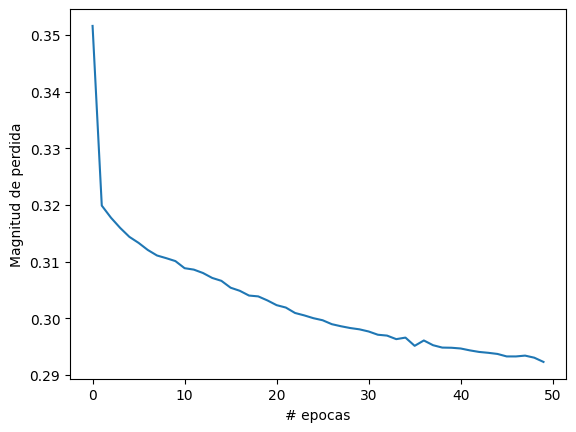

In [41]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [42]:
modelo.evaluate(X_test, y_test)

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8473 - loss: 0.3287


[0.3268251121044159, 0.8502695560455322]

In [43]:
y_pred = modelo.predict(X_test)
y_pred_class= np.argmax(y_pred, axis=1)
y_pred_df = pd.DataFrame(np.round(y_pred_class), columns=['Estimacion'])

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [44]:
estimar = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=['Real']), y_pred_df], axis=1)
print(estimar)

              0         1         2         3         4         5         6  \
0     -1.522045  0.562205  2.249331  1.128557 -0.415607  0.918860  0.899584   
1     -1.595396  0.562205 -0.086035  1.128557 -0.802340  0.918860  1.648212   
2     -1.008588 -1.266833  1.540907  1.128557 -0.415607  0.918860 -0.597673   
3     -1.375343  0.562205  0.289639 -0.723781 -0.028874  0.918860  1.648212   
4      0.605135  0.562205  0.536599  1.128557 -0.415607  0.918860 -0.098588   
...         ...       ...       ...       ...       ...       ...       ...   
14648  1.045241 -2.181352 -0.283804  1.128557 -0.415607 -1.088304  1.648212   
14649 -0.128376 -2.181352  0.939629  1.128557 -0.415607  0.918860  0.899584   
14650  1.632049  0.562205  0.378175  1.128557 -0.415607  0.918860 -1.595844   
14651 -0.641833  0.562205 -0.227293  1.128557 -0.415607  0.918860 -1.595844   
14652 -0.641833 -1.266833 -1.333858  1.128557 -0.802340 -1.088304 -1.595844   

              7         8         9        10      

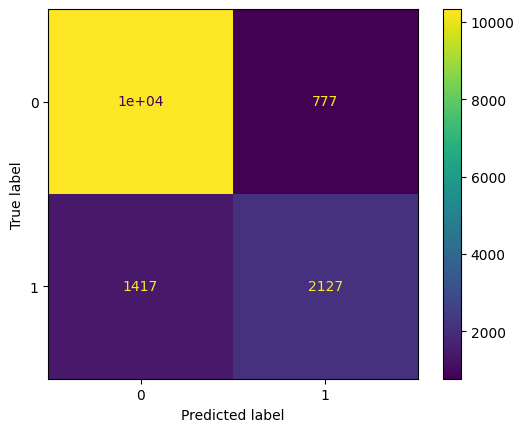

In [45]:
disp=ConfusionMatrixDisplay(confusion_matrix(pd.DataFrame(y_test),y_pred_df))
disp.plot()